# Week 3 - Group Assignment 2

**Description:** Exploring Asthma Prevalence in LA County

**Author:** Aydin Pasebani (Group Members: Annie Chan, Max Garcia, Miles Kim Parr, Rodrigo Gutierrez)


As a group, we are measuring up household income data against availability of parks throughout Los Angeles County. We are each covering a Supervisorial District. 1-5. 

I'm covering SD 1, which spans from East LA to Pomona. I'm taking a health lens and looking at asthma rates first. Then I'm going to add a layer with household income and Supervisorial District boundaries. Finally, I'll take a deeper look and evaluate District 1 data with the 3 data sets.

Importing pandas and geopandas libraries

In [3]:
import pandas as pd
import geopandas as gpd

Next, I'll load my data from Cal Enviro Screen 4.0. I'm specifically looking at asthma (calculated by emergency department visits for asthma symptoms). According to Cal OEHHA, this is the best available way of describing differences in asthma across the state at the census tract scale. 

In [48]:
csv_file_path = 'data/asthma_lacounty_calenviro.csv'
df = pd.read_csv('data/asthma_lacounty_calenviro.csv')

# Let's take a further look

In [27]:
asthma.shape

(2343, 8)

In [28]:
asthma.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,Asthma
0,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,76.10
1,6037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,86.77
2,6037543202,5124,Los Angeles,90220,Compton,-118.230032,33.879862,114.33
3,6037203300,2000,Los Angeles,90033,Los Angeles,-118.207788,34.058872,65.53
4,6037291220,3640,Los Angeles,90247,Los Angeles,-118.286709,33.877139,64.77


In [145]:
asthma = pd.read_csv('data/asthma_lacounty_calenviro.csv', dtype= {'Census Tract':str,})

In [147]:
asthma['Census Tract'] = asthma['Census Tract'].str.zfill(11)

In [148]:
asthma.head(5)

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,Asthma
0,06037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,76.10
1,06037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,86.77
2,06037543202,5124,Los Angeles,90220,Compton,-118.230032,33.879862,114.33
3,06037203300,2000,Los Angeles,90033,Los Angeles,-118.207788,34.058872,65.53
4,06037291220,3640,Los Angeles,90247,Los Angeles,-118.286709,33.877139,64.77


In [29]:
asthma.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Census Tract          2343 non-null   int64  
 1   Total Population      2343 non-null   int64  
 2   California County     2343 non-null   object 
 3   ZIP                   2343 non-null   int64  
 4   Approximate Location  2343 non-null   object 
 5   Longitude             2343 non-null   float64
 6   Latitude              2343 non-null   float64
 7   Asthma                2334 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 146.6+ KB


In [31]:
asthma.columns[asthma.isna().all()].tolist()

[]

<Axes: ylabel='Frequency'>

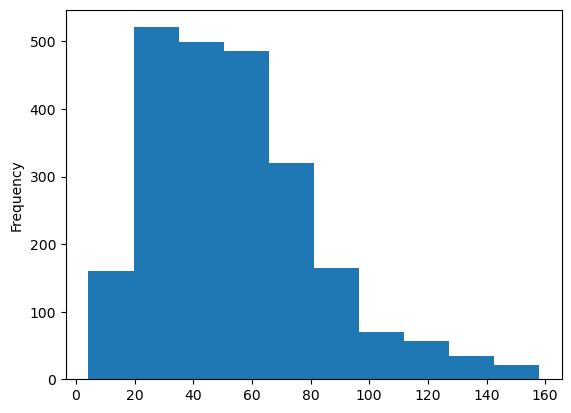

In [34]:
asthma['Asthma'].plot.hist()

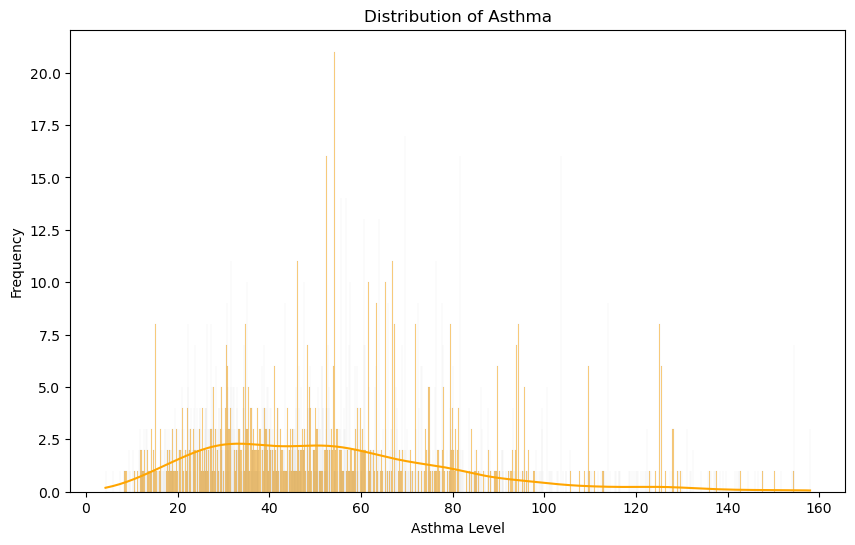

In [66]:
df_cleaned = df.dropna(subset=['Asthma'])
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Asthma'], bins=2344, kde=True, color='orange')
plt.title('Distribution of Asthma')
plt.xlabel('Asthma Level')
plt.ylabel('Frequency')
plt.show()

The first histogram did not give me the output I wanted. I had to make some changes. 

First, I cleaned the data by removing rows where the asthma column has missing values so we're only keeping data with asthma values

Second, I created some space for the histogram chart. 10 inches wide and 6 inches tall

Next, I used the sns library to create this chart. with the cleaned data, set the color of the bar, a smooth line, and number of bars. there's 2344 census tracts in the data so I placed them all here. 

lastly, created title & labels

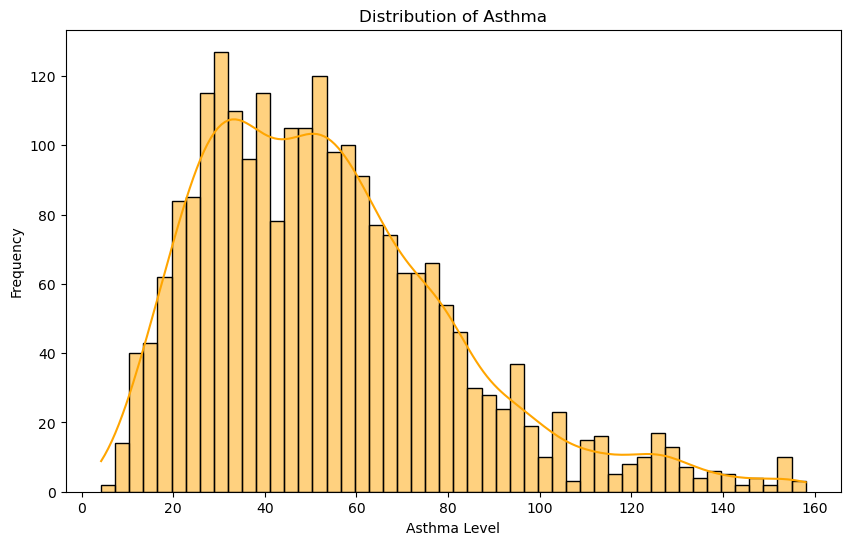

In [68]:
df_cleaned = df.dropna(subset=['Asthma'])
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Asthma'], bins=50, kde=True, color='orange')
plt.title('Distribution of Asthma')
plt.xlabel('Asthma Level')
plt.ylabel('Frequency')
plt.show()

looks better w/ reduced # of bars. 

# Filtering Data

In [51]:
asthma.sort_values(by='Asthma', ascending=False)[['Census Tract', 'Asthma']].head(10)

,Census Tract,Asthma
690,06037900804,158.01
705,06037900806,158.01
1019,06037900703,158.01
1398,06037900605,154.47
1617,06037900507,154.47
1859,06037900508,154.47
1484,06037900608,154.47
1585,06037900506,154.47
1360,06037900505,154.47
1543,06037900609,154.47


In [33]:
asthma['Census Tract'] = asthma['Census Tract'].str.zfill(11)

In [167]:
asthma.sort_values(by='Asthma', ascending=True)[['Census Tract', 'Asthma']].head(10)

,Census Tract,Asthma
2298,06037265301,4.28
2024,06037800410,5.94
2331,06037980019,7.45
2290,06037670406,8.35
2279,06037670500,8.46
2241,06037262200,8.53
2282,06037800330,8.64
2295,06037262802,8.83
2167,06037670202,9.22
2165,06037670403,9.34


In [168]:
asthma = asthma.rename(columns = {'Census Tract':'FIPS'})

In [169]:
asthma.head(10)

,FIPS,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,Asthma
0,06037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,76.10
1,06037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,86.77
2,06037543202,5124,Los Angeles,90220,Compton,-118.230032,33.879862,114.33
3,06037203300,2000,Los Angeles,90033,Los Angeles,-118.207788,34.058872,65.53
4,06037291220,3640,Los Angeles,90247,Los Angeles,-118.286709,33.877139,64.77
5,06037433501,1949,Los Angeles,91733,South El Monte,-118.065122,34.057255,65.92
6,06037243100,6772,Los Angeles,90059,Los Angeles,-118.235093,33.932796,129.20
7,06037227010,5705,Los Angeles,90011,Los Angeles,-118.246997,34.018526,68.48
8,06037226001,2615,Los Angeles,90021,Los Angeles,-118.250274,34.024484,72.02
9,06037433101,2464,Los Angeles,91731,El Monte,-118.060557,34.068691,60.57


Next, I'll take a look at household income

In [170]:
income = pd.read_csv(
    'data/household_income_lac.csv',
    dtype=
    {
        'GEO_ID': str
    }
)

In [171]:
income.shape

(2499, 35)

In [172]:
income.head()

,GEO_ID,Households,HH_MOE,HH_Less_Than_10K,HH_Less_Than_10K_MOE,HH_10K_To_14999,HH_10K_to_14999_MOE,HH_15K_To_19999,HH_15K_To_19999_MOE,HH_20K_To_24999,...,HH_75K_To_99999,HH_75K_To_99999_MOE,HH_100K_To_124999,HH_100K_To_124999_MOE,HH_125K_To_149999,HH_125K_To_149999_MOE,HH_150K_To_199999,HH_150K_To_199999_MOE,HH_200K_Or_More,HH_200K_Or_More_MOE
0,06037,3342811,5387,180980,3750,142812,2810,112340,2741,121032,...,414844,4941,325230,4641,237643,3257,299389,3720,418793,4962
1,06037101110,1494,123,54,37,126,82,49,46,33,...,146,69,210,79,134,64,143,83,90,52
2,06037101122,1372,167,88,74,0,13,7,11,42,...,158,58,126,57,194,135,168,77,253,83
3,06037101220,1357,201,78,53,82,39,28,27,102,...,134,65,116,68,60,35,140,152,112,64
4,06037101221,1450,287,76,110,107,123,118,76,148,...,193,109,207,107,33,41,108,93,0,13


renaming so we have a uniform FIPS column throughout the assignment

In [173]:
income = income.rename(columns = {'GEO_ID':'FIPS'})

In [174]:
income.head()

,FIPS,Households,HH_MOE,HH_Less_Than_10K,HH_Less_Than_10K_MOE,HH_10K_To_14999,HH_10K_to_14999_MOE,HH_15K_To_19999,HH_15K_To_19999_MOE,HH_20K_To_24999,...,HH_75K_To_99999,HH_75K_To_99999_MOE,HH_100K_To_124999,HH_100K_To_124999_MOE,HH_125K_To_149999,HH_125K_To_149999_MOE,HH_150K_To_199999,HH_150K_To_199999_MOE,HH_200K_Or_More,HH_200K_Or_More_MOE
0,06037,3342811,5387,180980,3750,142812,2810,112340,2741,121032,...,414844,4941,325230,4641,237643,3257,299389,3720,418793,4962
1,06037101110,1494,123,54,37,126,82,49,46,33,...,146,69,210,79,134,64,143,83,90,52
2,06037101122,1372,167,88,74,0,13,7,11,42,...,158,58,126,57,194,135,168,77,253,83
3,06037101220,1357,201,78,53,82,39,28,27,102,...,134,65,116,68,60,35,140,152,112,64
4,06037101221,1450,287,76,110,107,123,118,76,148,...,193,109,207,107,33,41,108,93,0,13


In [175]:
income.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   FIPS                   2499 non-null   object
 1   Households             2499 non-null   int64 
 2   HH_MOE                 2499 non-null   int64 
 3   HH_Less_Than_10K       2499 non-null   int64 
 4   HH_Less_Than_10K_MOE   2499 non-null   int64 
 5   HH_10K_To_14999        2499 non-null   int64 
 6   HH_10K_to_14999_MOE    2499 non-null   int64 
 7   HH_15K_To_19999        2499 non-null   int64 
 8   HH_15K_To_19999_MOE    2499 non-null   int64 
 9   HH_20K_To_24999        2499 non-null   int64 
 10  HH_20K_To_24999_MOE    2499 non-null   int64 
 11  HH_25K_To_29999        2499 non-null   int64 
 12  HH_25K_To_29999_MOE    2499 non-null   int64 
 13  HH_30K_To_34999        2499 non-null   int64 
 14  HH_30K_To_34999_MOE    2499 non-null   int64 
 15  HH_35K_To_39999      

In [176]:
income.columns[income.isna().all()].tolist()

[]

<Axes: ylabel='Frequency'>

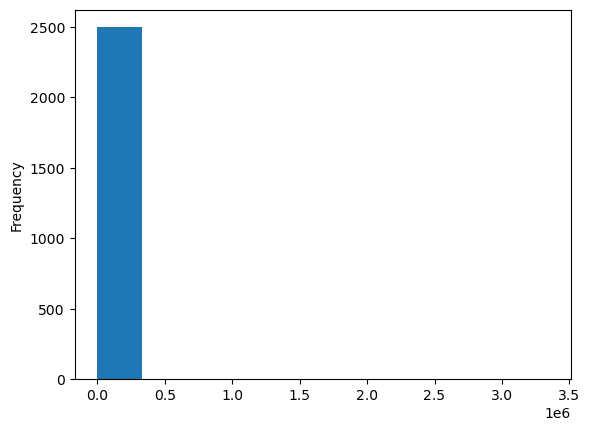

In [177]:
income['Households'].plot.hist()

In [45]:
income.drop(index=income.index[0], axis=0, inplace=True)

<Axes: ylabel='Frequency'>

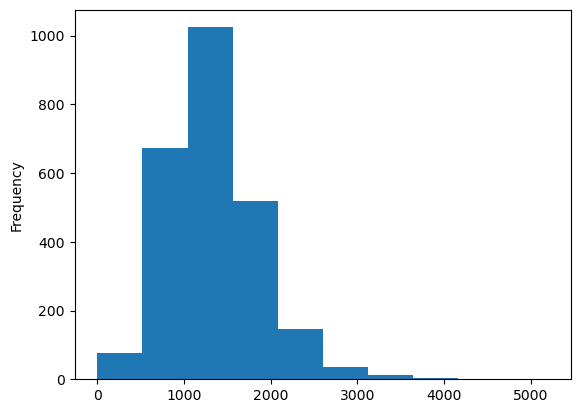

In [46]:
income['Households'].plot.hist()

<Axes: xlabel='HH_Less_Than_10K', ylabel='HH_100K_To_124999'>

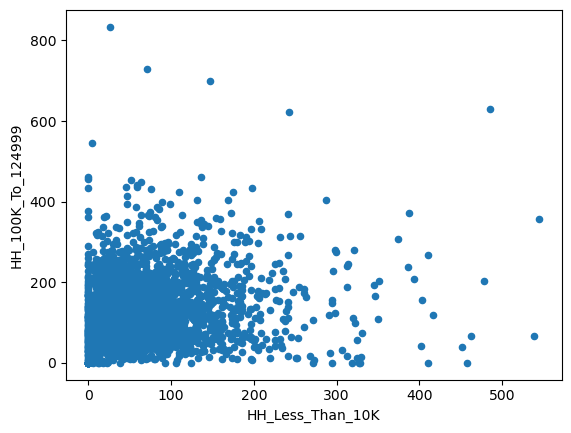

In [50]:
income.plot.scatter(x='HH_Less_Than_10K', y='HH_100K_To_124999')

In [178]:
income.sort_values(by='HH_10K_To_14999', ascending = False)[['FIPS', 'HH_10K_To_14999']].head(10)

,FIPS,HH_10K_To_14999
0,06037,142812
603,06037207502,709
2330,06037900806,486
596,06037207304,465
1156,06037310701,456
1158,06037310704,434
2023,06037575803,419
1584,06037500900,414
2239,06037700102,396
2265,06037701902,395


fips code 06037207502 has the most house holds with incomes from 10k to 14,999

In [179]:
income.sort_values(by='HH_Less_Than_10K', ascending = False)[['FIPS', 'HH_Less_Than_10K']].head(10)

,FIPS,HH_Less_Than_10K
0,06037,180980
2256,06037701402,545
596,06037207304,538
607,06037207902,485
2027,06037576200,478
631,06037209300,462
589,06037206301,458
907,06037242600,451
2064,06037600202,416
846,06037236205,410


fips code 06037701402 has the most households with incomes less than 10k

In [180]:
income.sort_values(by='HH_75K_To_99999', ascending = False)[['FIPS', 'HH_75K_To_99999']].head(10)    

,FIPS,HH_75K_To_99999
0,06037,414844
2281,06037703003,714
2045,06037577100,695
2103,06037602106,692
2211,06037651222,689
2047,06037577300,661
1497,06037463601,660
2026,06037576001,650
2242,06037700400,640
2240,06037700200,604


fips code 06037703003 has the most households with incomes from 75k to 99,999. LAC median is 82.5 k. with this im trying to see which codes are close to the median income

In [58]:
income['HH_Less_Than_10K'].sum()

180980

In [61]:
income['HH_75K_To_99999'].sum()

414844

In [62]:
income['HH_200K_Or_More'].sum()

418793

Very Low Income Households: 180,980
Average Income Households: 414,844
Very High Income Households: 418,793

In [195]:
district = gpd.read_file('data/alldistricts.csv')

In [196]:
district.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,geometry
0,1,1,1,101110,1011.10,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,1676518.62890625,5565.41134050116,None
1,2,1,2,101122,1011.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,3881000.54296875,11695.3042767108,None
2,3,1,3,101220,1012.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,1025452.0859375,4688.6071469117,None
3,4,1,4,101221,1012.21,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,519705.703125,3378.8243265165,None
4,5,1,5,101222,1012.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,,INCORPORATED CITY,3,San Fernando Valley Planning Area,435061.8671875,3685.23331215193,None


In [197]:
district = pd.read_csv('data/alldistricts.csv',
    dtype =
    {
        'CT20':str,
    }
)
district

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length
0,1,1,1,101110,1011.10,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.676519e+06,5565.411341
1,2,1,2,101122,1011.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,3.881001e+06,11695.304277
2,3,1,3,101220,1012.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.025452e+06,4688.607147
3,4,1,4,101221,1012.21,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,5.197057e+05,3378.824327
4,5,1,5,101222,1012.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,4.350619e+05,3685.233312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,2491,1,2491,980035,9800.35,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,INDUSTRY,AVOCADO HEIGHTS,INCORPORATED/UNINCORPORATED,6,East San Gabriel Valley Planning Area,2.326586e+07,39539.218299
2491,2492,2,2492,980036,9800.36,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,NaN,WHITTIER NARROWS,UNINCORPORATED AREA,7,West San Gabriel Valley Planning Area,1.278349e+07,24943.502850
2492,2493,2,2493,980037,9800.37,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,CARSON,NaN,INCORPORATED CITY,11,South Bay Planning Area,1.891289e+06,5551.732493
2493,2494,1,2494,980038,9800.38,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,NaN,LADERA HEIGHTS / VIEWPARK - WINDSOR HILLS,UNINCORPORATED AREA,5,Westside Planning Area,6.588690e+06,15825.162522


In [198]:
district.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID_12    2495 non-null   int64  
 1   Join_Count     2495 non-null   int64  
 2   TARGET_FID     2495 non-null   int64  
 3   CT20           2495 non-null   object 
 4   LABEL          2495 non-null   float64
 5   NAME           2495 non-null   object 
 6   SUP_NAME       2495 non-null   object 
 7   DIST_SUP       2495 non-null   int64  
 8   CITYNAME_ALF   2262 non-null   object 
 9   NAME_1         283 non-null    object 
 10  JURISDICTION   2495 non-null   object 
 11  AREA_NUM       2495 non-null   int64  
 12  AREA_NAME      2495 non-null   object 
 13  Shape__Area    2495 non-null   float64
 14  Shape__Length  2495 non-null   float64
dtypes: float64(3), int64(5), object(7)
memory usage: 292.5+ KB


In [199]:
district['FIPS'] = '06' + '037' + district['CT20']
district.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,FIPS
0,1,1,1,101110,1011.10,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.676519e+06,5565.411341,06037101110
1,2,1,2,101122,1011.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,3.881001e+06,11695.304277,06037101122
2,3,1,3,101220,1012.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.025452e+06,4688.607147,06037101220
3,4,1,4,101221,1012.21,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,5.197057e+05,3378.824327,06037101221
4,5,1,5,101222,1012.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,4.350619e+05,3685.233312,06037101222


made fips so they can merge

importing census tracts

In [200]:
tracts = gpd.read_file('data/Census_Tracts_2020.geojson')

In [201]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [202]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [203]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [205]:
tracts_income= tracts.merge(income, on = "FIPS")

In [206]:
tracts_income.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,Households,HH_MOE,HH_Less_Than_10K,...,HH_75K_To_99999,HH_75K_To_99999_MOE,HH_100K_To_124999,HH_100K_To_124999_MOE,HH_125K_To_149999,HH_125K_To_149999_MOE,HH_150K_To_199999,HH_150K_To_199999_MOE,HH_200K_Or_More,HH_200K_Or_More_MOE
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,1494,123,54,...,146,69,210,79,134,64,143,83,90,52
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,1372,167,88,...,158,58,126,57,194,135,168,77,253,83
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,1357,201,78,...,134,65,116,68,60,35,140,152,112,64
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,1450,287,76,...,193,109,207,107,33,41,108,93,0,13
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,935,148,161,...,96,79,9,15,81,74,0,13,32,53


In [207]:
tracts_asthma= tracts.merge(asthma, on = "FIPS")

In [208]:
tracts_asthma.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,Asthma
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,4283,Los Angeles,91042,Los Angeles,-118.292987,34.259474,30.87
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,3405,Los Angeles,91042,Los Angeles,-118.290147,34.267721,26.78
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,3702,Los Angeles,91042,Los Angeles,-118.281632,34.251609,30.87
3,6,101300,1013.00,2.777377e+07,29384.860602,"POLYGON ((-118.26530 34.25735, -118.26530 34.2...",06037101300,3884,Los Angeles,91042,Los Angeles,-118.270999,34.248778,22.91
4,7,101400,1014.00,6.791532e+07,42668.928986,"POLYGON ((-118.29657 34.25356, -118.29694 34.2...",06037101400,3458,Los Angeles,91042,Los Angeles,-118.294163,34.242853,24.28


merged the datasets

# Mapping Hopefully

<Axes: >

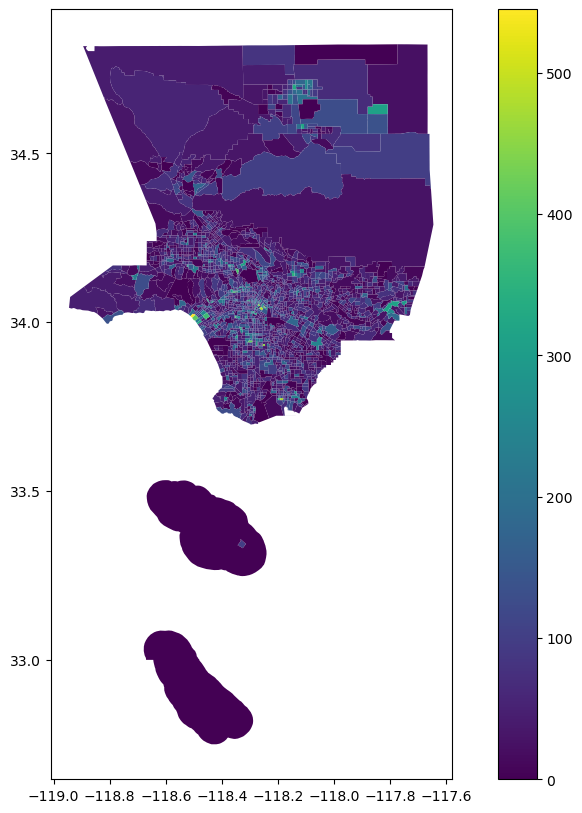

In [211]:
tracts_income.plot(figsize=(12,10),
                 column='HH_Less_Than_10K',
                 legend=True, 
                 )

<Axes: >

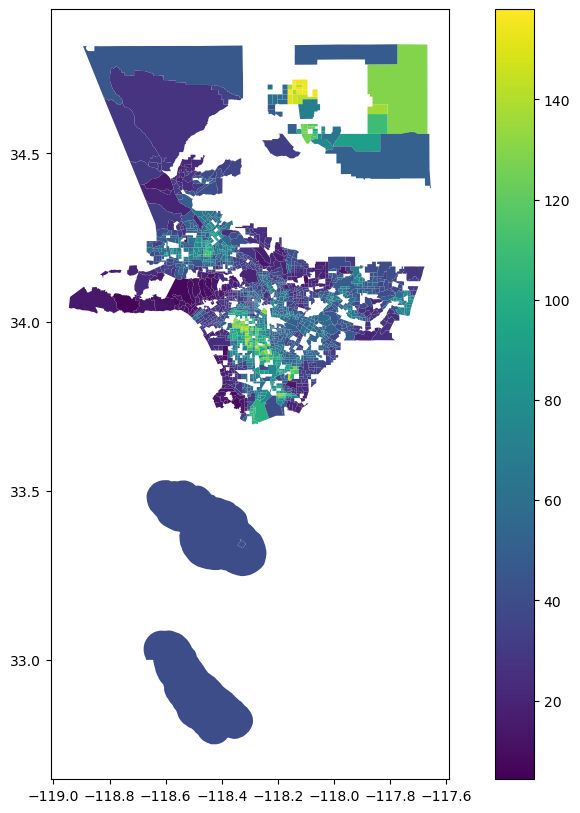

In [212]:
tracts_asthma.plot(figsize=(12,10),
                 column='Asthma',
                 legend=True, 
                 )

not really sure what this is..

missing pieces may be unpopulated areas? let's look at 1st district specific data now

In [213]:
district1 = pd.read_csv('data/firstdistrict.csv',
    dtype =
    {
        'CT20':str,
    }
)
district1

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length
0,392,2,392,181000,1810.00,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,LOS ANGELES,NaN,INCORPORATED CITY,3,Metro Planning Area,6.056830e+06,13924.623031
1,393,2,393,181300,1813.00,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,LOS ANGELES,NaN,INCORPORATED CITY,3,Metro Planning Area,2.108680e+06,7910.212974
2,394,1,394,181400,1814.00,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,1.286523e+06,5315.104783
3,395,2,395,181500,1815.00,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,LOS ANGELES,NaN,INCORPORATED CITY,7,Metro Planning Area,1.601307e+06,6595.395568
4,396,1,396,181600,1816.00,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,1.828893e+06,6616.753409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1681,2,1681,532102,5321.02,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,MONTEBELLO,NaN,INCORPORATED CITY,7,West San Gabriel Valley Planning Area,1.490718e+06,5028.920729
493,1682,2,1682,532200,5322.00,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,MONTEBELLO,NaN,INCORPORATED CITY,7,West San Gabriel Valley Planning Area,4.090516e+06,10016.034375
494,2469,1,2469,980010,9800.10,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,5.602460e+06,13484.450603
495,2491,1,2491,980035,9800.35,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,INDUSTRY,AVOCADO HEIGHTS,INCORPORATED/UNINCORPORATED,6,East San Gabriel Valley Planning Area,2.326586e+07,39539.218299


In [215]:
district1['FIPS'] = '06' + '037' + district1['CT20']
district1.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,FIPS
0,392,2,392,181000,1810.0,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,LOS ANGELES,NaN,INCORPORATED CITY,3,Metro Planning Area,6.056830e+06,13924.623031,06037181000
1,393,2,393,181300,1813.0,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,LOS ANGELES,NaN,INCORPORATED CITY,3,Metro Planning Area,2.108680e+06,7910.212974,06037181300
2,394,1,394,181400,1814.0,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,1.286523e+06,5315.104783,06037181400
3,395,2,395,181500,1815.0,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,LOS ANGELES,NaN,INCORPORATED CITY,7,Metro Planning Area,1.601307e+06,6595.395568,06037181500
4,396,1,396,181600,1816.0,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,1.828893e+06,6616.753409,06037181600


In [216]:
district1income=tracts_income.merge(district1,on="FIPS")

<Axes: >

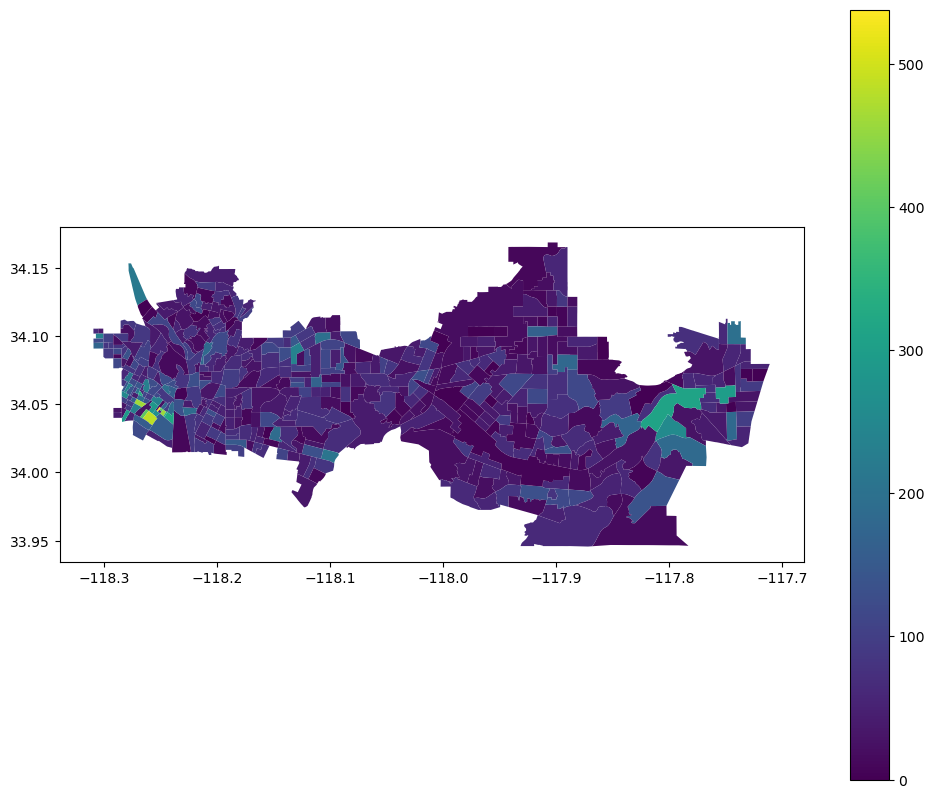

In [218]:
district1income.plot(figsize=(12,10),
                 column='HH_Less_Than_10K',
                 legend=True, )

<Axes: >

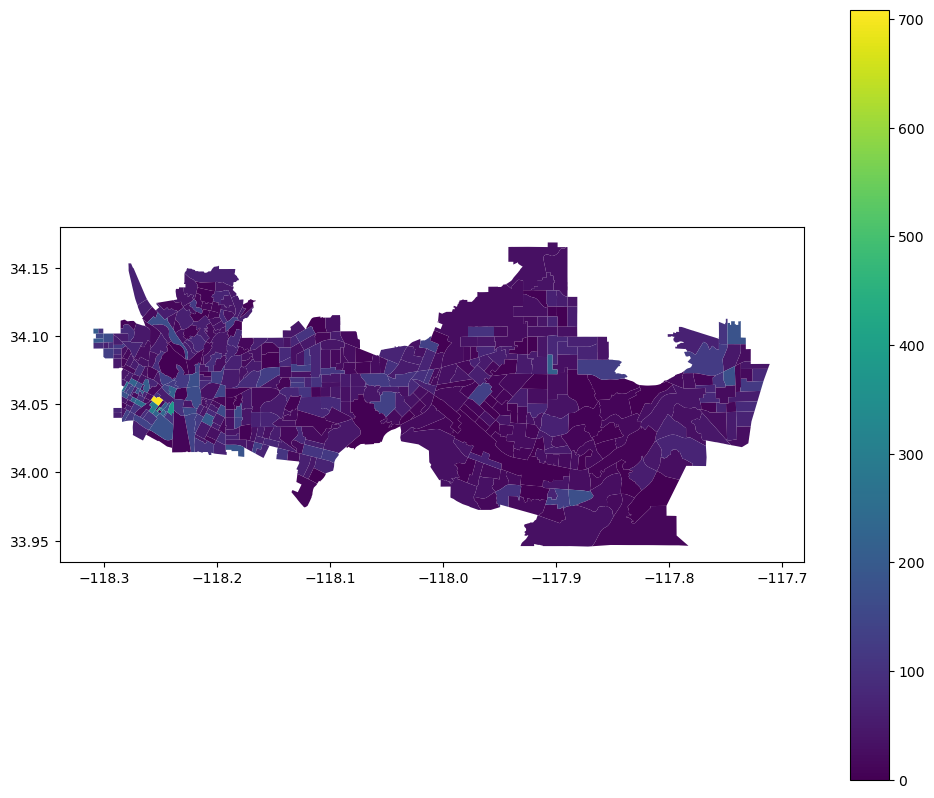

In [221]:
district1income.plot(figsize=(12,10),
                 column='HH_10K_To_14999',
                 legend=True, )

<Axes: >

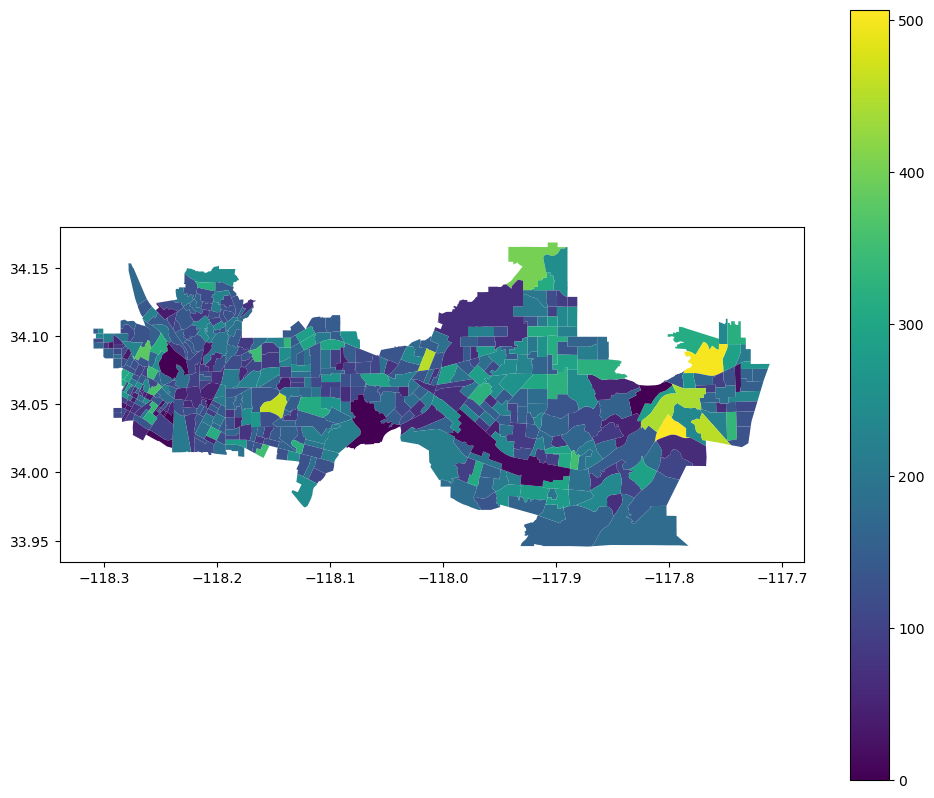

In [222]:
district1income.plot(figsize=(12,10),
                 column='HH_75K_To_99999',
                 legend=True, )

<Axes: >

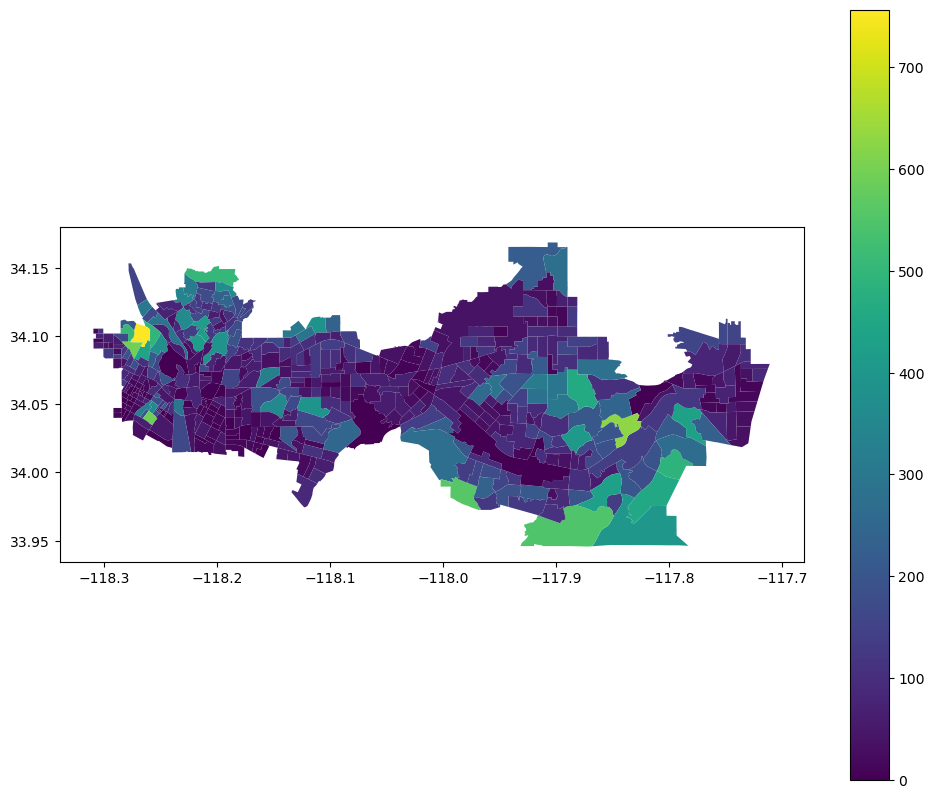

In [223]:
district1income.plot(figsize=(12,10),
                 column='HH_200K_Or_More',
                 legend=True, )

not many wealthy areas in district. but the district leans towards lower income / median income

In [219]:
district1asthma=tracts_asthma.merge(district1,on="FIPS")

<Axes: >

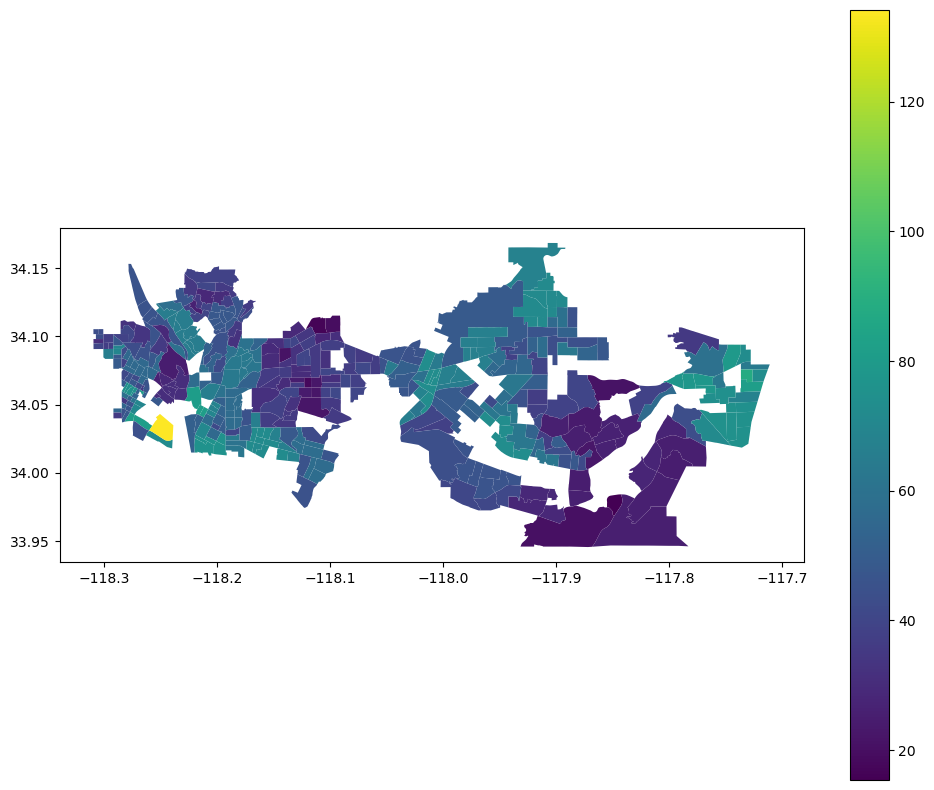

In [220]:
district1asthma.plot(figsize=(12,10),
                 column='Asthma',
                 legend=True, )

plotting asthma. fluctuating rates throughout

now lets see if we can map unincorporated areas only

repeat steps..

In [235]:
unincorporated1 = pd.read_csv('data/unincorporatedirstdistrict.csv',
    dtype =
    {
        'CT20':str,
    }
)
unincorporated1

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length
0,1222,2,1222,402404,4024.04,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,WALNUT ISLANDS,NaN,UNINCORPORATED AREA,6,East San Gabriel Valley Planning Area,5.974928e+06,13183.750300
1,1250,1,1250,403325,4033.25,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,SOUTH DIAMOND BAR,NaN,UNINCORPORATED AREA,6,East San Gabriel Valley Planning Area,2.494259e+07,30915.155200
2,1261,2,1261,403500,4035.00,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,WALNUT ISLANDS,WALNUT ISLANDS,UNINCORPORATED AREA,6,East San Gabriel Valley Planning Area,7.184811e+06,13788.509380
3,1271,2,1271,404000,4040.00,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,COVINA ISLANDS,NaN,UNINCORPORATED AREA,6,East San Gabriel Valley Planning Area,1.932501e+06,5941.924886
4,1272,1,1272,404100,4041.00,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,COVINA ISLANDS,NaN,UNINCORPORATED AREA,6,East San Gabriel Valley Planning Area,1.972687e+06,5985.005607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1674,2,1674,531702,5317.02,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,EAST LOS ANGELES,NaN,UNINCORPORATED AREA,9,Metro Planning Area,9.808095e+05,4475.121437
71,1675,1,1675,531800,5318.00,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,EAST LOS ANGELES,NaN,UNINCORPORATED AREA,7,Metro Planning Area,9.064319e+05,4807.722001
72,1676,2,1676,531901,5319.01,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,EAST LOS ANGELES,NaN,UNINCORPORATED AREA,9,Metro Planning Area,1.124814e+06,4387.684576
73,1677,2,1677,531902,5319.02,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,EAST LOS ANGELES,NaN,UNINCORPORATED AREA,7,Metro Planning Area,1.032304e+06,4164.815094


In [239]:
unincorporated1['FIPS'] = '06' + '037' + unincorporated1['CT20']
unincorporated1.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,FIPS
0,1222,2,1222,402404,4024.04,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,WALNUT ISLANDS,NaN,UNINCORPORATED AREA,6,East San Gabriel Valley Planning Area,5.974928e+06,13183.750300,06037402404
1,1250,1,1250,403325,4033.25,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,SOUTH DIAMOND BAR,NaN,UNINCORPORATED AREA,6,East San Gabriel Valley Planning Area,2.494259e+07,30915.155200,06037403325
2,1261,2,1261,403500,4035.00,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,WALNUT ISLANDS,WALNUT ISLANDS,UNINCORPORATED AREA,6,East San Gabriel Valley Planning Area,7.184811e+06,13788.509380,06037403500
3,1271,2,1271,404000,4040.00,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,COVINA ISLANDS,NaN,UNINCORPORATED AREA,6,East San Gabriel Valley Planning Area,1.932501e+06,5941.924886,06037404000
4,1272,1,1272,404100,4041.00,1ST SUP. DISTRICT,1ST DISTRICT: HILDA L. SOLIS,1,COVINA ISLANDS,NaN,UNINCORPORATED AREA,6,East San Gabriel Valley Planning Area,1.972687e+06,5985.005607,06037404100


In [240]:
unincorporated1income=tracts_income.merge(unincorporated1,on="FIPS")

<Axes: >

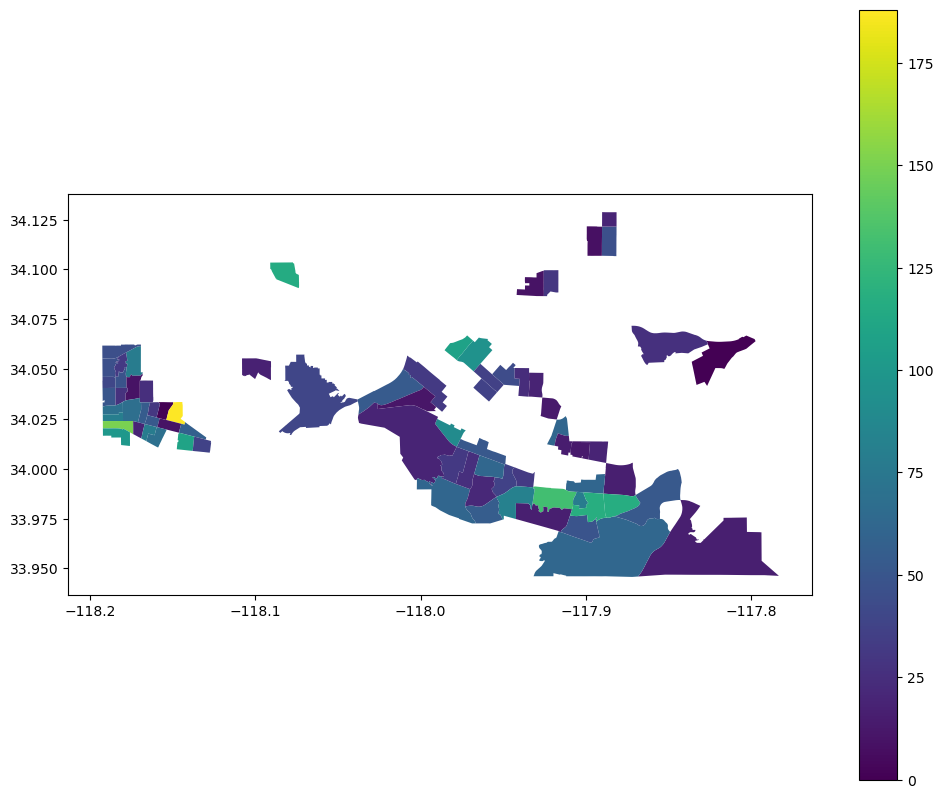

In [241]:
unincorporated1income.plot(figsize=(12,10),
                 column='HH_Less_Than_10K',
                 legend=True, )

<Axes: >

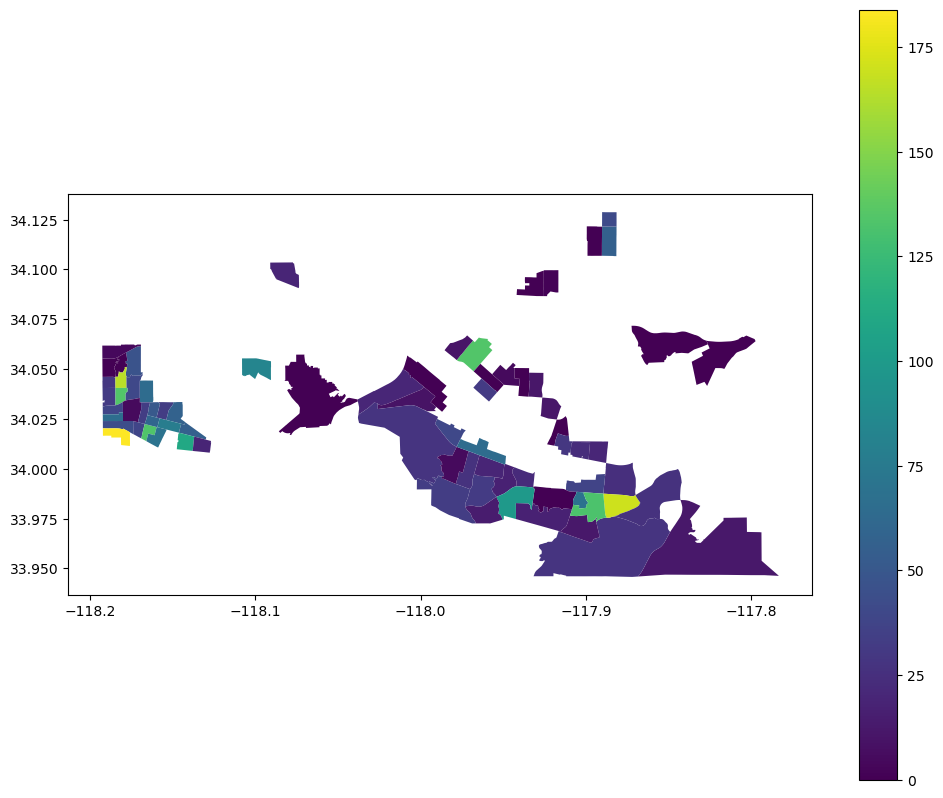

In [242]:
unincorporated1income.plot(figsize=(12,10),
                 column='HH_10K_To_14999',
                 legend=True, )

<Axes: >

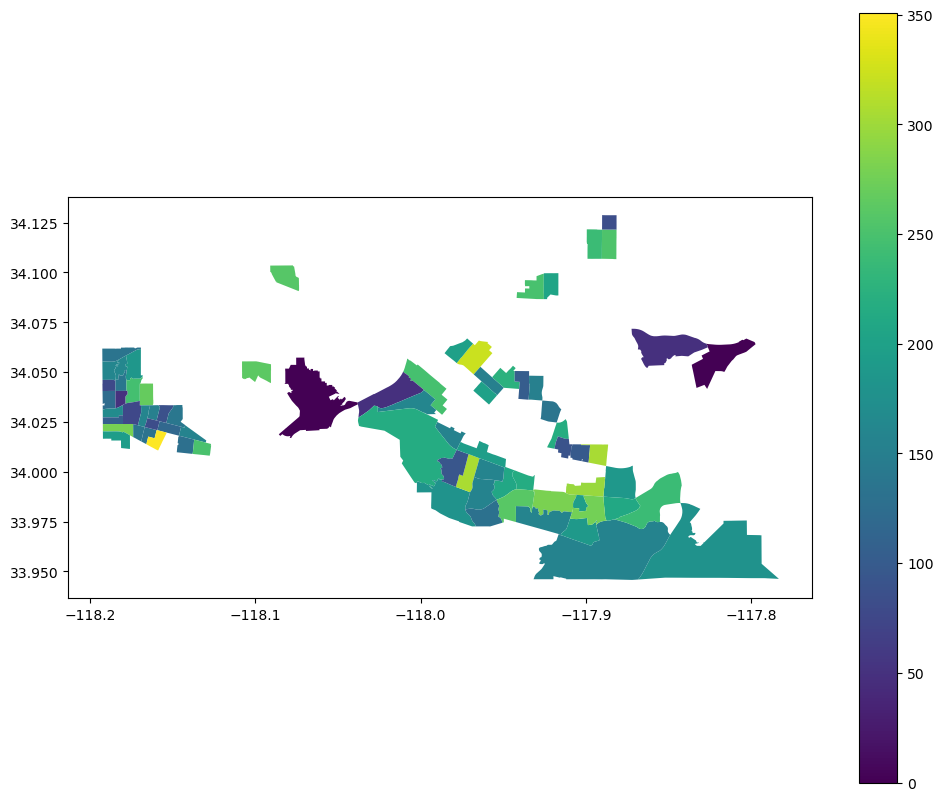

In [245]:
unincorporated1income.plot(figsize=(12,10),
                 column='HH_75K_To_99999',
                 legend=True, )

<Axes: >

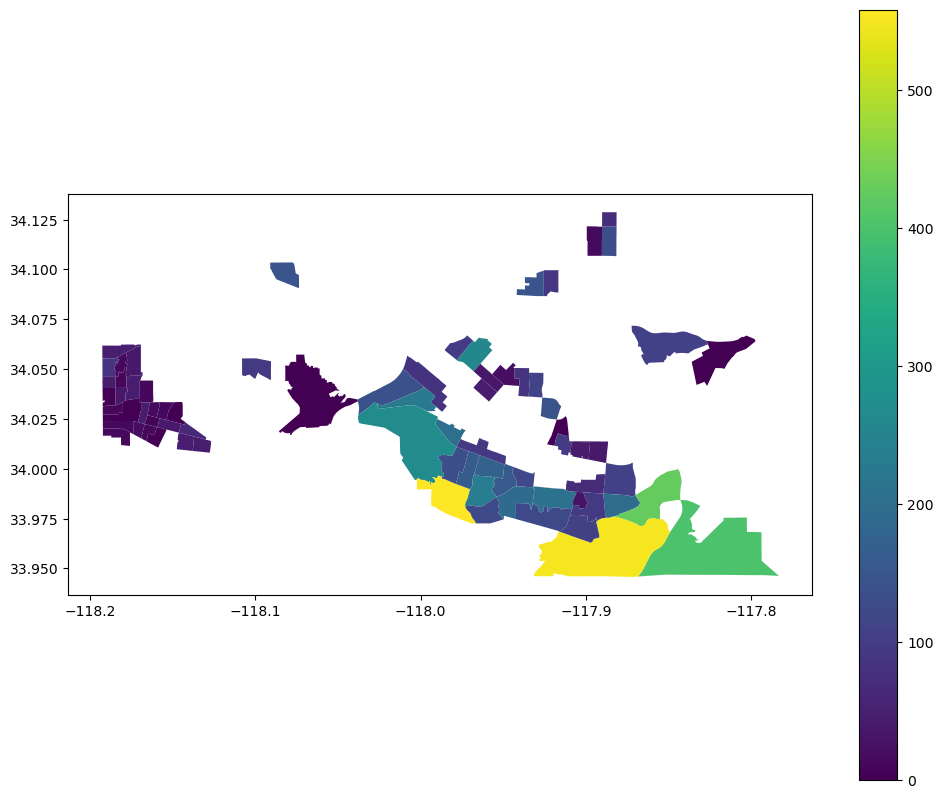

In [244]:
unincorporated1income.plot(figsize=(12,10),
                 column='HH_200K_Or_More',
                 legend=True, )

In [246]:
unincorporated1asthma=tracts_asthma.merge(unincorporated1,on="FIPS")

<Axes: >

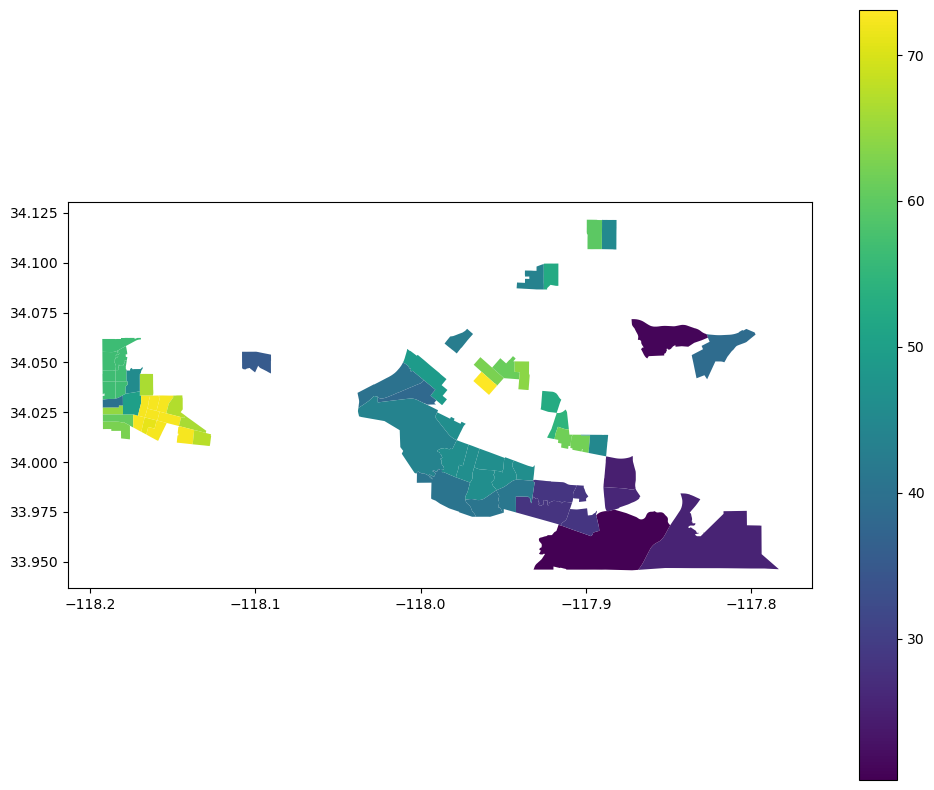

In [247]:
unincorporated1asthma.plot(figsize=(12,10),
                 column='Asthma',
                 legend=True, )

now we've plotted both incorporated and unincorporated areas and can compare the areas

In [248]:
import folium 

In [265]:
m = folium.Map(location=[34.050, -118], 
               zoom_start = 10, 
               tiles='CartoDB positron', 
               attribution='CartoDB')

#lets see how this goes over the map
folium.Choropleth(
                  geo_data=unincorporated1asthma, 
                  data=unincorporated1asthma,         
                  key_on='feature.properties.FIPS', 
                  columns=['FIPS', 'Asthma'], 
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2,
                  legend_name='Asthma Prevalence').add_to(m)    

In [266]:
m.save('sd1_unincorporated.html')

In [263]:
p = folium.Map(location=[34.050, -118], 
               zoom_start = 10, 
               tiles='CartoDB positron', 
               attribution='CartoDB')

#lets see how this goes over the map
folium.Choropleth(
                  geo_data=unincorporated1income, 
                  data=unincorporated1income,         
                  key_on='feature.properties.FIPS', 
                  columns=['FIPS', 'HH_75K_To_99999'], 
                  fill_color='YlOrRd',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2,
                  legend_name='Number of Households With Incomes Between 75k to 99,999').add_to(p)    

In [264]:
p.save('sd1_un_75k_99999.html')